In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as linregress
import numpy as np
import scipy.stats as st


# File to Load (Remember to Change These)
bitcoin = "BTC-USD.csv"
NVDA = "NVDA.csv"

# Read Purchasing File and store into Pandas data frame
bitcoin_df = pd.read_csv(bitcoin)
print(bitcoin_df.head())
nvda_df = pd.read_csv(NVDA)
print(nvda_df.head())

         Date        Open        High         Low       Close   Adj Close  \
0  10/30/2016  714.117981  714.117981  696.474976  701.864014  701.864014   
1  10/31/2016  702.640015  709.289001  691.682007  700.971985  700.971985   
2   11/1/2016  701.336975  736.452026  701.336975  729.793030  729.793030   
3   11/2/2016  730.065979  740.828979  722.348999  740.828979  740.828979   
4   11/3/2016  742.346008  745.773010  678.156006  688.700012  688.700012   

        Volume  
0  100665000.0  
1   97064400.0  
2  130527000.0  
3   84865200.0  
4  172808000.0  
         Date       Open       High      Low      Close  Adj Close    Volume
0  10/31/2016  17.697500  17.907499  17.6875  17.790001  17.534466  25238800
1   11/1/2016  17.855000  17.952499  17.0725  17.262501  17.014545  47322400
2   11/2/2016  17.395000  17.629999  17.1600  17.190001  16.943089  29584800
3   11/3/2016  17.270000  17.285000  16.6600  16.990000  16.745955  30966400
4   11/4/2016  16.877501  17.182501  16.6450  16.8

In [77]:
bit_nvda_merge = pd.merge(nvda_df, bitcoin_df, how="inner", on="Date")
bit_nvda_merge = bit_nvda_merge.rename(columns={"Open_x":"NVDA Open","High_x":"NVDA High", "Low_x": "NVDA Low", "Close_x": "NVDA Close", "Adj Close_x":"NVDA Adj Close", "Volume_x":"NVDA Volume", "Open_y":"Bitcoin Open","High_y":"Bitcoin High", "Low_y": "Bitcoin Low", "Close_y": "Bitcoin Close", "Adj Close_y":"Bitcoin Adj Close", "Volume_y":"Bitcoin Volume"})
bit_nvda_merge = bit_nvda_merge.dropna()         
bit_nvda_merge

,Date,NVDA Open,NVDA High,NVDA Low,NVDA Close,NVDA Adj Close,NVDA Volume,Bitcoin Open,Bitcoin High,Bitcoin Low,Bitcoin Close,Bitcoin Adj Close,Bitcoin Volume
0,10/31/2016,17.697500,17.907499,17.687500,17.790001,17.534466,25238800,702.640015,709.289001,691.682007,700.971985,700.971985,9.706440e+07
1,11/1/2016,17.855000,17.952499,17.072500,17.262501,17.014545,47322400,701.336975,736.452026,701.336975,729.793030,729.793030,1.305270e+08
2,11/2/2016,17.395000,17.629999,17.160000,17.190001,16.943089,29584800,730.065979,740.828979,722.348999,740.828979,740.828979,8.486520e+07
3,11/3/2016,17.270000,17.285000,16.660000,16.990000,16.745955,30966400,742.346008,745.773010,678.156006,688.700012,688.700012,1.728080e+08
4,11/4/2016,16.877501,17.182501,16.645000,16.892500,16.649858,32878000,689.124023,706.929993,685.562988,703.234985,703.234985,9.990770e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,10/25/2021,229.729996,233.550003,227.699997,231.660004,231.660004,23023500,60893.925780,63729.324220,60691.800780,63039.824220,63039.824220,3.106491e+10
1255,10/26/2021,239.889999,252.589996,239.240005,247.169998,247.169998,48589800,63032.761720,63229.027340,59991.160160,60363.792970,60363.792970,3.487897e+10
1256,10/27/2021,244.740005,250.899994,242.820007,244.509995,244.509995,24599000,60352.000000,61435.183590,58208.187500,58482.386720,58482.386720,4.365708e+10
1257,10/28/2021,248.779999,249.500000,245.229996,249.410004,249.410004,23420400,58470.730470,62128.632810,58206.917970,60622.136720,60622.136720,4.525708e+10


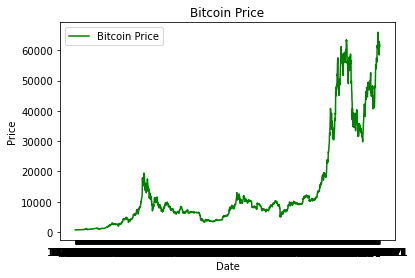

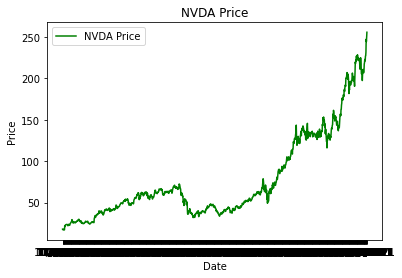

In [78]:
# plotting both nvda and bit

dates = bitcoin_df["Date"]
close_price = bitcoin_df["Close"]

plt.plot(dates, close_price, color="green", label="Bitcoin Price")
plt.legend(loc="best")
plt.title("Bitcoin Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

dates = nvda_df["Date"]
close_price = nvda_df["Close"]

plt.plot(dates, close_price, color="green", label="NVDA Price")
plt.legend(loc="best")
plt.title("NVDA Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

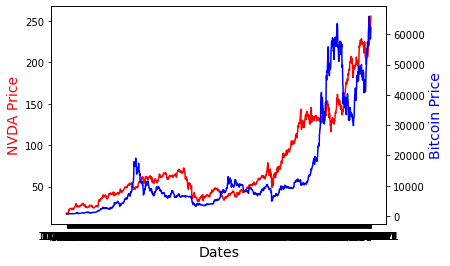

In [79]:
###### plotting both lines - Data with NVDA VS BITCOIN
nvdaclose_price = bit_nvda_merge["NVDA Close"]
bitclose_price = bit_nvda_merge["Bitcoin Close"]
dates = bit_nvda_merge["Date"]
# plt.plot(nvdaclose_price, color="green", label="NVDA Price")
# plt.plot(bitclose_price, color="red", label="Bitcoin Price")

# plt.legend(loc="best")
# plt.title("Bitcoin vs NVDA Price")
# plt.xlabel("NVDA")
# plt.ylabel("Bitcoin")
# plt.show()

# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(dates, nvdaclose_price, color="red")
# set x-axis label
ax.set_xlabel("Dates",fontsize=14)
# set y-axis label
ax.set_ylabel("NVDA Price",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(dates, bitclose_price,color="blue")
ax2.set_ylabel("Bitcoin Price",color="blue",fontsize=14)
plt.show()
# save the plot as a file
fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

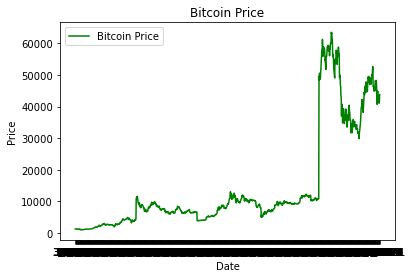

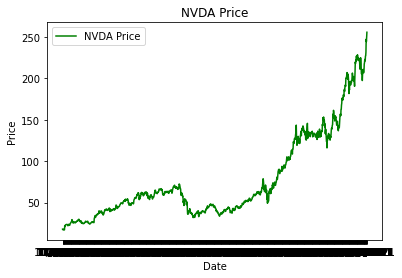

In [80]:
dates = bitcoin_df_2020["Date"]
close_price = bitcoin_df_2020["Close"]

plt.plot(dates, close_price, color="green", label="Bitcoin Price")
plt.legend(loc="best")
plt.title("Bitcoin Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

dates = nvda_df["Date"]
close_price = nvda_df["Close"]

plt.plot(dates, close_price, color="green", label="NVDA Price")
plt.legend(loc="best")
plt.title("NVDA Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

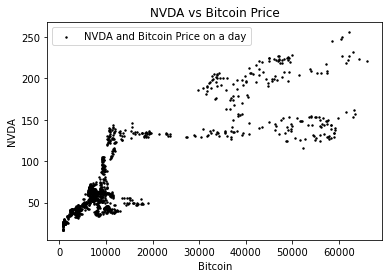

0.856496160717857

In [91]:
## scatter plot of NVDA and Bitcoin
bit_close_price = bit_nvda_merge["Bitcoin Close"]
nvda_close_price = bit_nvda_merge["NVDA Close"]

plt.scatter(bit_close_price, nvda_close_price, color="black", s=2, label="NVDA and Bitcoin Price on a day")

plt.legend(loc="best")
plt.title("NVDA vs Bitcoin Price")
plt.xlabel("Bitcoin")
plt.ylabel("NVDA")

correlation = st.pearsonr(bit_close_price, nvda_close_price)
plt.show()
correlation[0]

In [93]:
(slope, intercept, rvalue, pvalue, stderr) = st(bit_close_price, nvda_close_price)
# regress_values = bit_close_price * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")

TypeError: 'module' object is not callable

In [ ]:
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

In [15]:
print(bit_close_price.count())
print(nvda_close_price.count())

1069
1259


In [25]:
# nvda_close_price = nvda_close_price.loc[(nvda_close_price["Date"] > "10/30/2016")]
# & nvda_close_price["Date"] < "10/29/2021"]

KeyError: 'Date'